In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from collections import OrderedDict

"""
Publication tag
#* --- paperTitle
#@ --- Authors
#t ---- Year
#c  --- publication venue
#index 00---- index id of this paper
#% ---- the id of references of this paper (there are multiple lines, with each indicating a reference)
#! --- Abstract
"""

pub_dict = {
    'index': [],        #index
    'paper_title': [],  #*
    'author': [],       #@
    'year': [],         #t
    'venue': [],        #c
    'ref_id': [],       #%
    'abstract': []}     #!

tuple_ref = ()
list_authors = []
set_authors, set_venues, set_publications, set_references = set(), set(), set(), set()

In [2]:
with open('AP_train.txt', mode = 'r', encoding = 'utf-8-sig') as f:
    string = ''
    lines = f.readlines()

    for line in lines:
        if line.startswith('#index'):
            index = int(line[7:])
            pub_dict['index'].append(index)
            set_publications.add(index)
        elif line.startswith('#*'):
            pub_dict['paper_title'].append(line[3:-1])
        elif line.startswith('#@'):
            line = line[3:-1]
            list_authors = [v.strip() for v in line.split(';')]
            pub_dict['author'].append(list_authors)
            for author in list_authors:
                set_authors.add(author)
                
        elif line.startswith('#c'):
            venue = line[3:-1]
            pub_dict['venue'].append(venue)
            set_venues.add(venue)
        elif line.startswith('#t'):
            pub_dict['year'].append(line[3:-1])
        elif line.startswith('#%'):
            tuple_ref += (int(line[3:-1]),)
        elif line.startswith('#!'):
            string = line[3:-1]
            pub_dict['abstract'].append(string)

        if line == '\n':
            pub_dict['ref_id'].append(tuple_ref)
            if string == '':
                pub_dict['abstract'].append(string)
            for ref in tuple_ref:
                set_references.add(ref)
            tuple_ref, string = (), ''

In [3]:
df = pd.DataFrame.from_dict(pub_dict, orient='index').transpose()
df

,index,paper_title,author,year,venue,ref_id,abstract
0,1,Book Review: Discover Linux,[Marjorie Richardson],1998,Linux Journal,(),
1,2,MOSFET table look-up models for circuit simula...,[],1984,"Integration, the VLSI Journal",(),
2,3,The verification of the protection mechanisms ...,[Virgil D. Gligor],1984,International Journal of Parallel Programming,(),
3,4,Another view of functional and multivalued dep...,"[M. Gyssens, J. Paredaens]",1984,International Journal of Parallel Programming,(),
4,5,Entity-relationship diagrams which are in BCNF,"[Sushil Jajodia, Peter A. Ng, Frederick N. Spr...",1984,International Journal of Parallel Programming,(),
...,...,...,...,...,...,...,...
1976810,2092351,Post-release reliability growth in software pr...,"[Pankaj Jalote, Brendan Murphy, Vibhu Saujanya...",2008,ACM Transactions on Software Engineering and M...,"(215589, 215609, 342279, 656840, 719113, 78569...",Most software reliability growth models work u...
1976811,2092352,Topology analysis of software dependencies,[Martin P. Robillard],2008,ACM Transactions on Software Engineering and M...,"(347, 68701, 82316, 112290, 132217, 168251, 17...","Before performing a modification task, a devel..."
1976812,2092353,The impact of research on the development of m...,"[Wolfgang Emmerich, Mikio Aoyama, Joe Sventek]",2008,ACM Transactions on Software Engineering and M...,"(103, 1486, 4057, 8195, 9241, 12364, 23915, 31...",The middleware market represents a sizable seg...
1976813,2092354,The role of outcome feedback in improving the ...,"[Tanja M. Gruschke, Magne Jørgensen]",2008,ACM Transactions on Software Engineering and M...,"(162428, 233684, 334109, 420781, 450803, 56960...",Previous studies report that software develope...


## A. 
#### Compute the number of distinct authors, publication venues, publications, and citations/references

In [33]:
print('num of authors', len(set_authors))
print('num of publication venues', len(set_publications))
print('num of references', len(set_references))
print('num of venues', len(set_venues))

num of authors 1478734
num of publication venues 1976815
num of references 871089
num of venues 255686


## B.
#### Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?

In [5]:
for title, venue in zip(pub_dict['paper_title'], pub_dict['venue']):
    if 'Principles and Practice of Knowledge Discovery in Databases' in title:
        print('title:', title, end = '\n')
        print('venue:', venue)
        print('---')

title: Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
venue: PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
---
title: Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)
venue: Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)
---
title: Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)
venue: Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in

## C.
#### For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

In [6]:
publication_author_map = defaultdict(int)
hey = []

for title, authors in zip(pub_dict['paper_title'], pub_dict['author']):
    for author in authors:
        if author != '':
            publication_author_map[author] += 1

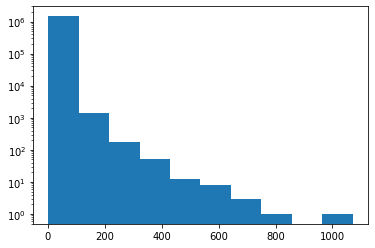

In [7]:
plt.hist(publication_author_map.values())
plt.yscale('log')
plt.show()

## D.
#### Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [8]:
print('std', np.std(list(publication_author_map.values())))
print('mean', np.mean(list(publication_author_map.values())))
print('1st q', np.quantile(list(publication_author_map.values()), .25))
print('2nd q', np.quantile(list(publication_author_map.values()), .50))
print('3rd q', np.quantile(list(publication_author_map.values()), .75))

std 8.871889691039373
mean 3.291785602945224
1st q 1.0
2nd q 1.0
3rd q 2.0


## E.
#### Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

In [9]:
publication_venue_map = defaultdict(int)

for title, venue in zip(pub_dict['paper_title'], pub_dict['venue']):
    publication_venue_map[venue] += 1

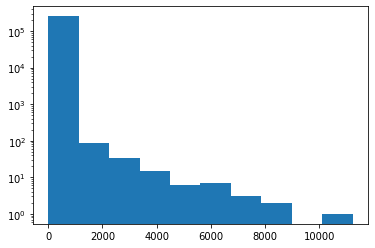

In [10]:
plt.hist(publication_venue_map.values())
plt.yscale('log')
plt.show()

In [11]:
print('std:', np.std(list(publication_venue_map.values())))
print('mean:', np.mean(list(publication_venue_map.values())))
print('1st quartile:', np.quantile(list(publication_venue_map.values()), .25))
print('2nd quartile:', np.quantile(list(publication_venue_map.values()), .50))
print('3rd quartile:', np.quantile(list(publication_venue_map.values()), .75))

std: 83.38105610357532
mean: 7.731416659496413
1st quartile: 1.0
2nd quartile: 1.0
3rd quartile: 1.0


In [12]:
venue_with_max_num_publications, max_num_publications = '', 0
for venue, num_publications in publication_venue_map.items():
    if max_num_publications < num_publications:
        max_num_publications = num_publications
        venue_with_max_num_publications = venue

print('The venue w/ largest number of publications:', venue_with_max_num_publications)
print('Number of publications:', max_num_publications)

The venue w/ largest number of publications: IEEE Transactions on Information Theory
Number of publications: 11227


## F.
#### Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

In [13]:
publication_citation_map = defaultdict(int)
publication_reference_map = defaultdict(int)

# map between number of references and publication
for index, ref_ids in zip(pub_dict['index'], pub_dict['ref_id']):
    for ref_id in ref_ids:
        publication_reference_map[index] += 1
        publication_citation_map[ref_id] += 1

publication_citation_map = OrderedDict(sorted(publication_citation_map.items()))

# # map between number of citations and publication
# print(len(publication_reference_map))
# print(len(publication_citation_map))

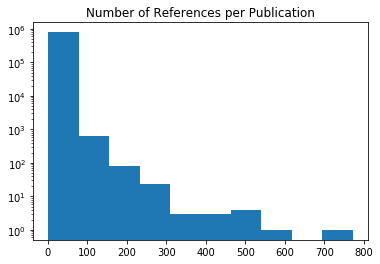

In [14]:
plt.hist(publication_reference_map.values())
plt.title('Number of References per Publication')
plt.yscale('log')

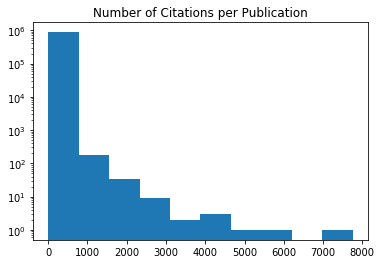

In [15]:
plt.hist(publication_citation_map.values())
plt.title('Number of Citations per Publication')
plt.yscale('log')

In [16]:
max_num_reference = max(publication_reference_map.values())
max_num_citation = max(publication_citation_map.values())
max_num_references_index, max_num_citations_index = 0, 0

for publication_index, num_references in publication_reference_map.items():
    if num_references == max_num_reference:
        max_num_references_index = publication_index

for publication_index, num_citations in publication_citation_map.items():
    if num_citations == max_num_citation:
        max_num_citations_index = publication_index

In [17]:
print('Publication with the largest number of references')
df[df['index'] == max_num_references_index]

Publication with the largest number of references


,index,paper_title,author,year,venue,ref_id,abstract
719351,719353,Cited References,"[Johannes Grabmeier, Erich Kaltofen, Volker We...",2003,Computer algebra handbook,"(293, 767, 858, 1363, 1460, 1807, 1825, 2172, ...",


In [18]:
print('Publication with the largest number of citations')
df[df['index'] == max_num_citations_index]

Publication with the largest number of citations


,index,paper_title,author,year,venue,ref_id,abstract
408394,408396,Computers and Intractability: A Guide to the T...,"[Michael R. Garey, David S. Johnson]",1979,Computers and Intractability: A Guide to the T...,(),


## G.
#### Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

In [19]:
publications_in_venue = defaultdict(list)

for index, venue in zip(pub_dict['index'], pub_dict['venue']):
    publications_in_venue[venue].append(int(index))

In [20]:
venue_impact_map = defaultdict(int)

max_impact_tuple = (0, '')  # (impact, venue)

for venue, num_of_publications in publication_venue_map.items():
    citation_count = 0

    for publication_index in publications_in_venue[venue]:
        if publication_index in publication_citation_map.keys():
            citation_count += publication_citation_map[publication_index]
    impact = citation_count / num_of_publications
    prev_impact = max_impact_tuple[0]
    
    venue_impact_map[venue] = impact

    if impact > prev_impact:
        max_impact_tuple = (impact, venue)

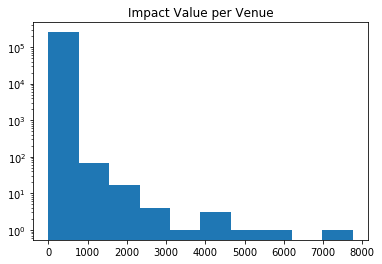

In [21]:
plt.hist(venue_impact_map.values())
plt.title('Impact Value per Venue')
plt.yscale('log')

## H.
#### What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

In [22]:
max_impact, max_impact_venue = max_impact_tuple
print('Venue with the highest apparent impact factor:', max_impact_venue)
print('Impact:', max_impact)

Venue with the highest apparent impact factor: Computers and Intractability: A Guide to the Theory of NP-Completeness
Impact: 7753.0


In [23]:
df[df['venue']=='Computers and Intractability: A Guide to the Theory of NP-Completeness']

,index,paper_title,author,year,venue,ref_id,abstract
408394,408396,Computers and Intractability: A Guide to the T...,"[Michael R. Garey, David S. Johnson]",1979,Computers and Intractability: A Guide to the T...,(),


## I.
#### Now repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

In [24]:
venue_impact_map = defaultdict(int)

max_impact_tuple = (0, '')  # (impact, venue)

for venue, num_of_publications in publication_venue_map.items():
    citation_count = 0
    if num_of_publications < 10:
        continue
    for publication_index in publications_in_venue[venue]:
        if publication_index in publication_citation_map.keys():
            citation_count += publication_citation_map[publication_index]
    impact = citation_count / num_of_publications
    prev_impact = max_impact_tuple[0]
    venue_impact_map[venue] = impact

    if impact > prev_impact:
        max_impact_tuple = (impact, venue)

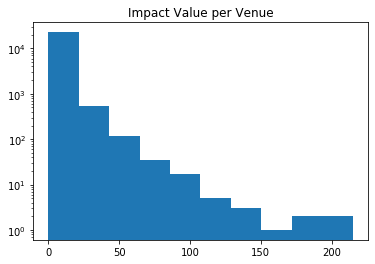

In [25]:
plt.hist(venue_impact_map.values())
plt.title('Impact Value per Venue')
plt.yscale('log')

In [26]:
max_impact, max_impact_venue = max_impact_tuple
print('Venue with the highest apparent impact factor:', max_impact_venue)
print('Impact:', max_impact)

Venue with the highest apparent impact factor: Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications
Impact: 214.82608695652175


In [27]:
df[df['venue']=='Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications'].head(5)

,index,paper_title,author,year,venue,ref_id,abstract
340162,340164,Hash-based IP traceback,"[Alex C. Snoeren, Craig Partridge, Luis A. San...",2001,Proceedings of the 2001 conference on Applicat...,"(280450, 307424, 310900, 310905, 322884, 51403...",The design of the IP protocol makes it difficu...
340163,340165,On the effectiveness of route-based packet fil...,"[Kihong Park, Heejo Lee]",2001,Proceedings of the 2001 conference on Applicat...,"(25998, 252536, 258612, 267191, 267192, 283833...",Denial of service (DoS) attack on the Internet...
340164,340166,Reliable group rekeying: a performance analysis,"[Yang Richard Yang, X. Steve Li, X. Brian Zhan...",2001,Proceedings of the 2001 conference on Applicat...,"(236781, 237387, 256854, 256856, 256885, 28428...","In secure group communications, users of a gro..."
340165,340167,Aging through cascaded caches: performance iss...,"[Edith Cohen, Haim Kaplan]",2001,Proceedings of the 2001 conference on Applicat...,"(149237, 188026, 256882, 271154, 286466, 96385...","The Web is a distributed system, where data is..."
340166,340168,Enabling conferencing applications on the inte...,"[Yang Chu, Sanjay Rao, Srinivasan Seshan, Hui ...",2001,Proceedings of the 2001 conference on Applicat...,"(45069, 194234, 283837, 303694, 310759, 336297...",In response to the serious scalability and dep...


In [28]:
max_impact_publications = [p for p in publications_in_venue[max_impact_venue]]
for p in max_impact_publications:
    print(df[df['index']==p][['paper_title']], '/ count:', publication_citation_map[p], end='\n')

                    paper_title
340162  Hash-based IP traceback / count: 167
                                              paper_title
340163  On the effectiveness of route-based packet fil... / count: 115
                                            paper_title
340164  Reliable group rekeying: a performance analysis / count: 48
                                              paper_title
340165  Aging through cascaded caches: performance iss... / count: 11
                                              paper_title
340166  Enabling conferencing applications on the inte... / count: 138
                                       paper_title
340167  IPNL: A NAT-extended internet architecture / count: 50
                                              paper_title
340168  On the impact of policing and rate guarantees ... / count: 10
                                              paper_title
340169  Scalable on-demand media streaming with packet... / count: 11
                                           

In [29]:
max_impact_publication_citation_counts = \
    [publication_citation_map[c] for c in max_impact_publications]

print('Mean number of citation counts for all publications from the venue with max impact equals', np.mean(max_impact_publication_citation_counts))
print('Median number of citation counts for all publications from the venue with max impact equals', np.median(max_impact_publication_citation_counts))

Mean number of citation counts for all publications from the venue with max impact equals 214.82608695652175
Median number of citation counts for all publications from the venue with max impact equals 46.0


## J.
#### Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

In [30]:
publication_year_map = defaultdict(list)
avg_num_citations, avg_num_references = {}, {}

# map between year and publication index
for year, publication_index in zip(pub_dict['year'], pub_dict['index']):
    if year != '':
        publication_year_map[year].append(int(publication_index))

for year, publications in sorted(publication_year_map.items()):
    reference_sum, citation_sum = 0, 0
    for publication_index in publications:
        if publication_index in publication_reference_map.keys():
            reference_sum += publication_reference_map[publication_index]
        if publication_index in publication_citation_map.keys():
            citation_sum += publication_citation_map[publication_index]
    avg_num_references[year] = reference_sum / len(publications)
    avg_num_citations[year] = citation_sum / len(publications)

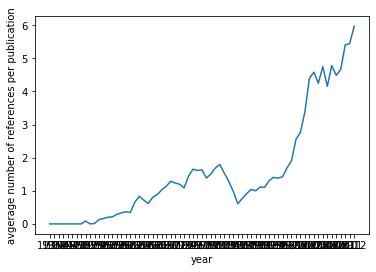

In [31]:
x, y = zip(*avg_num_references.items())
plt.ylabel('avgerage number of references per publication')
plt.xlabel('year')
plt.plot(x, y)

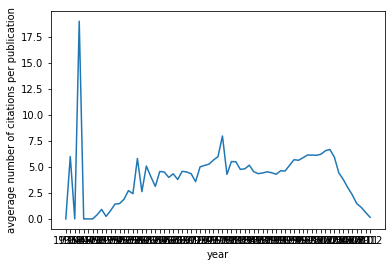

In [32]:
x, y = zip(*avg_num_citations.items())
plt.ylabel('avgerage number of citations per publication')
plt.xlabel('year')
plt.plot(x, y)